# Проект: Выбор локации для скважины

## Введение


_____
    
**Название проекта**

Выбор локации для скважины
_____
**Описание исследования.**

Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль. И  проанализировать возможную прибыль и риски техникой Bootstrap
_____

    
_____
**Задачи исследования.**

1. Загрузка и предобработка данных, проверка на наличие пропусков и ошибок.
2. Проведение исследовательского анализа данных и построение визуализаций.
3. Подготовка данных и обучение моделей.
4. Расчёт прибыли и рисков.
5. Вывод.
_____
**Исходные данные.**
    
1. geo_data_0.csv — содержит данные о скважинах первого региона.
2. geo_data_1.csv — содержит данные о скважинах второго региона.
3. geo_data_2.csv — содержит данные о скважинах третьего региона.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Загрузка данных:***
1. Загрузка данных из файлов 
2. Получение общей информации о каждом датасете.

***Часть 2. Предобработка данных:***
1. Проверка данных на наличие пропусков, дубликатов и ошибок.
2. Приведение данных к нужным типам и устранение пропусков.

***Часть 3. Исследовательский анализ данных (EDA):***
1. Проведение статистического анализа признаков.
2. Построение графиков для изучения распределений признаков и взаимосвязей между ними.

***Часть 4. Проведение корреляционного анализ признаков:***
1. Корреляционный анализ и изучение мультиколлинеарности признаков.

***Часть 5. Подготовка данных и обучение модели:***
1. Разделение таблиц на выборки
2. Обучение моделей прогнозирования.
3. Оценка качества модели на основе метрик. 

***Часть 6. Подготовка к расчёту прибыли:***
1. Ключевые значения для расчётов сохранить в отдельных переменных.
2. Рассчитать достаточный объём сырья для безубыточной разработки новой скважины.
3. Сравнить полученный объём сырья со средним запасом в каждом регионе. 
   
***Часть 7. Расчёт прибыли:***
1. Выбрать скважины с максимальными значениями предсказаний. 
2. Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
3. Рассчитать прибыль для полученного объёма сырья.

***Часть 8. Расчёт прибыли:***
 1. Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
 2. Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков.

***Часть 9. Общий вывод:***
1. Описание этапов работы.
2. Выводы по анализу прибыли и рискам.


##  Загрузка данных

___
    Импортируем все необходимые нам библиотеки
---

In [1]:
%pip install phik -q
%pip install shap -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import shap

from scipy import stats as st
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold

plt.rcParams["figure.figsize"] = (9,6)

___
    Загрузим данные
___

In [3]:
try:
    df_geo_data_0 = pd.read_csv("/kaggle/input/geo-data/geo_data_0.csv")
    df_geo_data_1 = pd.read_csv("/kaggle/input/geo-data/geo_data_1.csv")
    df_geo_data_2 = pd.read_csv("/kaggle/input/geo-data/geo_data_2.csv")

except:
    df_geo_data_0 = pd.read_csv("https://code.s3.yandex.net/datasets/geo_data_0.csv")
    df_geo_data_1 = pd.read_csv("https://code.s3.yandex.net/datasets/geo_data_1.csv")
    df_geo_data_2 = pd.read_csv("https://code.s3.yandex.net/datasets/geo_data_2.csv")

---
    Изучим предоставленные данные
---

In [4]:
df_geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
df_geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
df_geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [7]:
df_geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df_geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


___ 
Обратимся к документации таблицы для определения значений столбцов:
    

    1. id — уникальный идентификатор скважины;
    2-4. f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
    5. product — объём запасов в скважине (тыс. баррелей).
___

___ 
    По первичному просмотру данных можно сказать, что:
    1. Пропусков в столбцах нет
    2. Наименования столбцов соответствуют стандартам и идентичны друг другу
    3. Типы данных указаны правильные
___

##  Предобработка данных

---
    На этом этапе, необходимо проверить данные на наличие пропусков и дубликатов. 
    При необходимости устранить все проблемы с данными.
---

___
    Из выводов info() о данных, можно сделать вывод, что пропусков нет
___

___
    Категориальных данных для изучения нет 
___

___
    Проверим данные на наличие явных дубликатов и удалим их, если они есть
___

In [10]:
df_geo_data_0.duplicated().sum()

0

In [11]:
df_geo_data_1.duplicated().sum()

0

In [12]:
df_geo_data_2.duplicated().sum()

0

---
    Дубликатов нет. Удалять нечего
---

___
    Мы провели предобработку данных
    Дубликатов нет, данные приведены к стандарту
    
    Можем перейти к Анализу данных
___

##  Исследовательский анализ данных



___

    На этом этапе нам предстоит:
    - Провести статистический анализ признаков
    - Построить графики для каждого признака
    - Сделать выводы о данных
___


In [13]:
df_geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB




___

    Начнем с анализа f0
___


In [14]:
print(df_geo_data_0['f0'].describe(), '\n')
print(df_geo_data_1['f0'].describe(), '\n')
print(df_geo_data_2['f0'].describe(), '\n')

count    100000.000000
mean          0.500419
std           0.871832
min          -1.408605
25%          -0.072580
50%           0.502360
75%           1.073581
max           2.362331
Name: f0, dtype: float64 

count    100000.000000
mean          1.141296
std           8.965932
min         -31.609576
25%          -6.298551
50%           1.153055
75%           8.621015
max          29.421755
Name: f0, dtype: float64 

count    100000.000000
mean          0.002023
std           1.732045
min          -8.760004
25%          -1.162288
50%           0.009424
75%           1.158535
max           7.238262
Name: f0, dtype: float64 



Графики для датасета df_geo_data_0


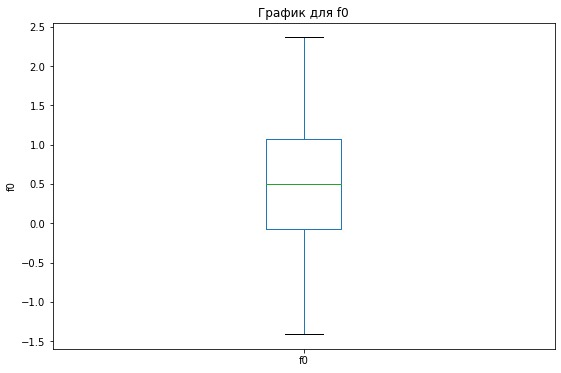

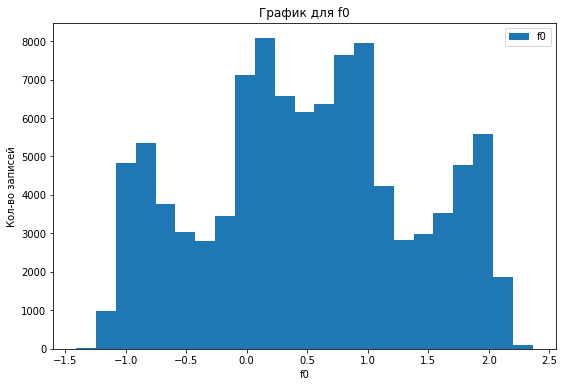

Графики для датасета df_geo_data_1


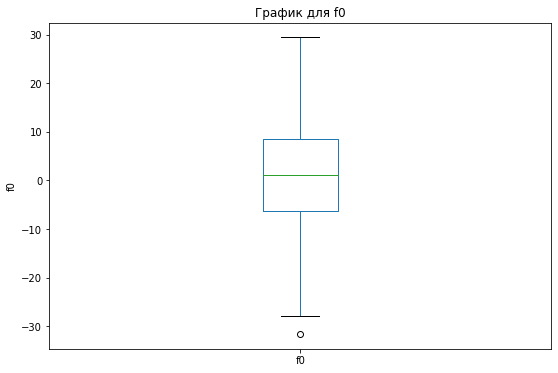

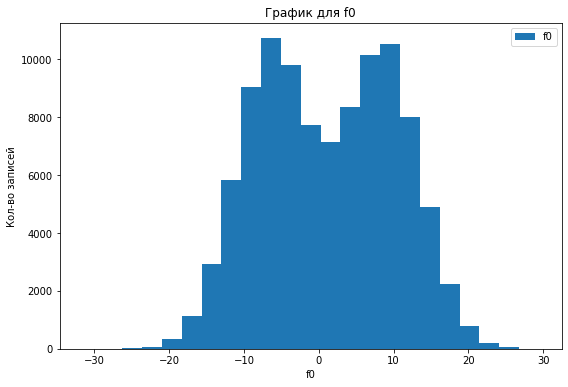

Графики для датасета df_geo_data_2


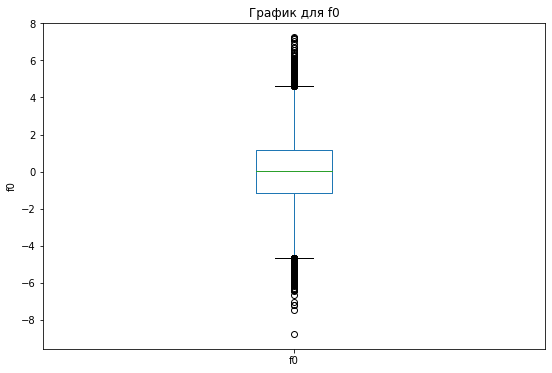

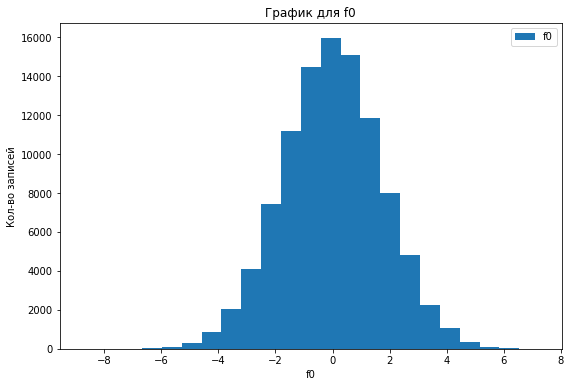

In [15]:
datasets = [df_geo_data_0, df_geo_data_1, df_geo_data_2]

for i in range(len(datasets)):
    print(f'Графики для датасета df_geo_data_{i}')
    
    datasets[i].plot(kind='box', y='f0')
    plt.ylabel('f0')
    plt.title(f'График для f0')
    plt.show()

    datasets[i].plot(kind='hist', y='f0', bins=23)
    plt.xlabel('f0')
    plt.ylabel('Кол-во записей')
    plt.title(f'График для f0')
    
    plt.show()

___
    В разных датасетах признак f0 варьируется от -30 до 30 или от -1.5 до 2.5
    Данные слишком отличаются друг от друга
    Имеются выбросы в датасетах df_geo_data_1 и df_geo_data_2. Их устранять мы не будем из-за неопределённости их важности
    Нормальное распределение признака можно увидеть только в df_geo_data_2
___



___

    Проведём анализ f1
___


In [16]:
print(df_geo_data_0['f1'].describe(), '\n')
print(df_geo_data_1['f1'].describe(), '\n')
print(df_geo_data_2['f1'].describe(), '\n')

count    100000.000000
mean          0.250143
std           0.504433
min          -0.848218
25%          -0.200881
50%           0.250252
75%           0.700646
max           1.343769
Name: f1, dtype: float64 

count    100000.000000
mean         -4.796579
std           5.119872
min         -26.358598
25%          -8.267985
50%          -4.813172
75%          -1.332816
max          18.734063
Name: f1, dtype: float64 

count    100000.000000
mean         -0.002081
std           1.730417
min          -7.084020
25%          -1.174820
50%          -0.009482
75%           1.163678
max           7.844801
Name: f1, dtype: float64 



Графики для датасета df_geo_data_0


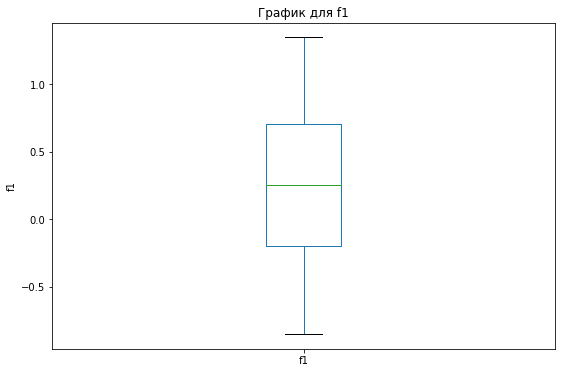

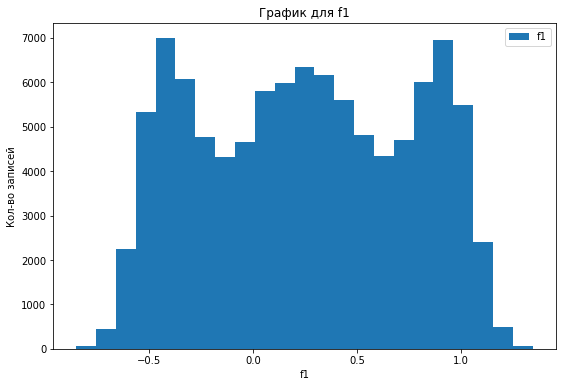

Графики для датасета df_geo_data_1


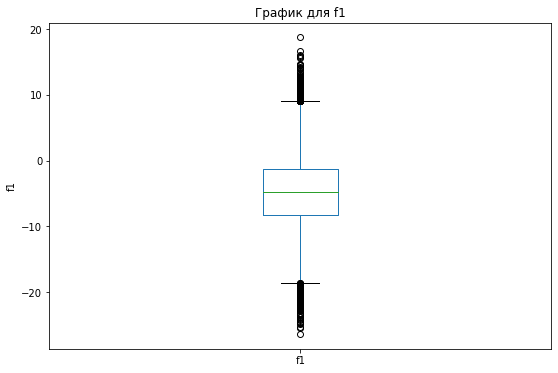

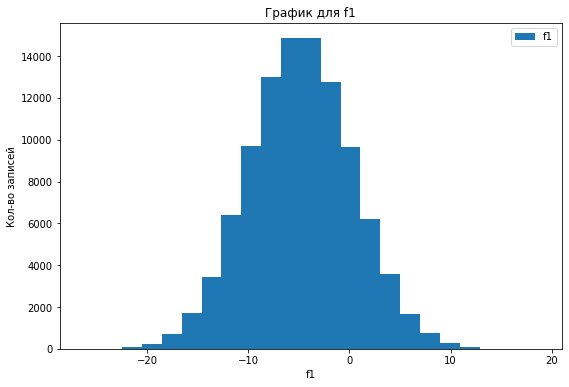

Графики для датасета df_geo_data_2


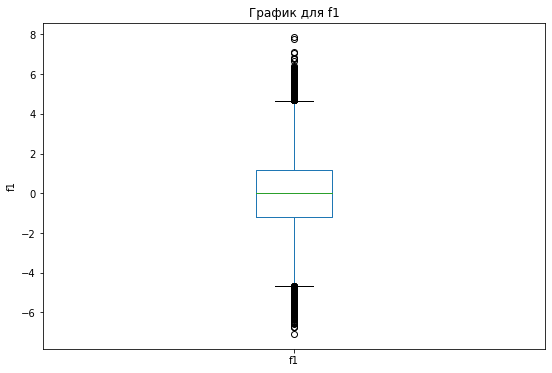

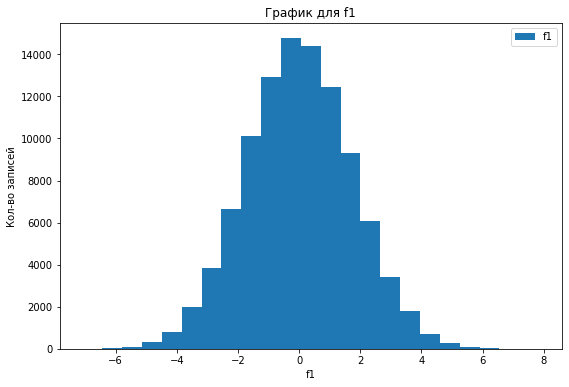

In [17]:
for i in range(len(datasets)):
    print(f'Графики для датасета df_geo_data_{i}')
    
    datasets[i].plot(kind='box', y='f1')
    plt.ylabel('f1')
    plt.title(f'График для f1')
    plt.show()

    datasets[i].plot(kind='hist', y='f1', bins=23)
    plt.xlabel('f1')
    plt.ylabel('Кол-во записей')
    plt.title(f'График для f1')
    
    plt.show()

___
    В разных датасетах признак f1 варьируется от -26 до 18 или от -0.8 до 1.3
    Данные также, как и f0 слишком отличаются друг от друга
    Имеются выбросы в датасетах df_geo_data_1 и df_geo_data_2. Их устранять мы не будем из-за неопределённости их важности
    Нормальное распределение признака можно увидеть в df_geo_data_1 и df_geo_data_2
___



___

    Проведём анализ f2
___


In [18]:
print(df_geo_data_0['f2'].describe(), '\n')
print(df_geo_data_1['f2'].describe(), '\n')
print(df_geo_data_2['f2'].describe(), '\n')

count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64 

count    100000.000000
mean          2.494541
std           1.703572
min          -0.018144
25%           1.000021
50%           2.011479
75%           3.999904
max           5.019721
Name: f2, dtype: float64 

count    100000.000000
mean          2.495128
std           3.473445
min         -11.970335
25%           0.130359
50%           2.484236
75%           4.858794
max          16.739402
Name: f2, dtype: float64 



Графики для датасета df_geo_data_0


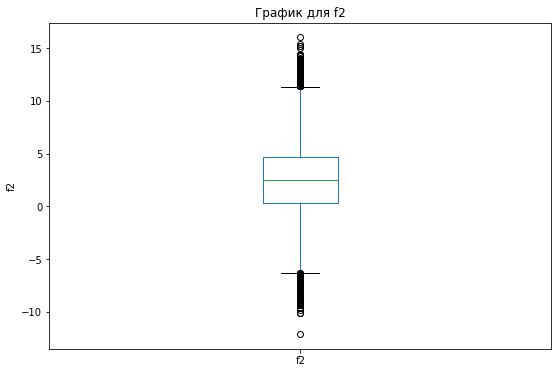

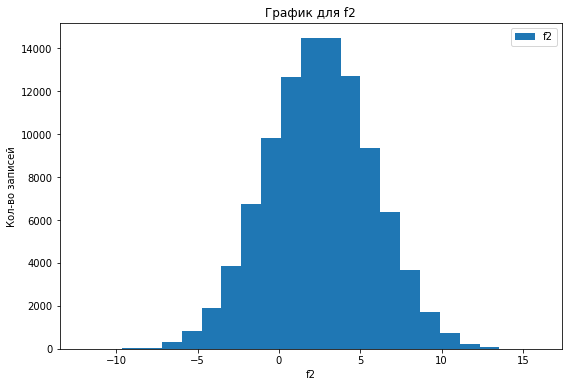

Графики для датасета df_geo_data_1


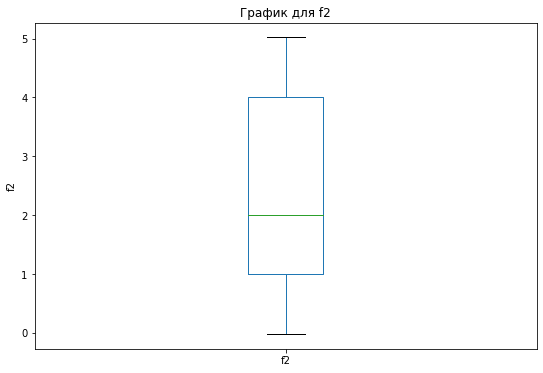

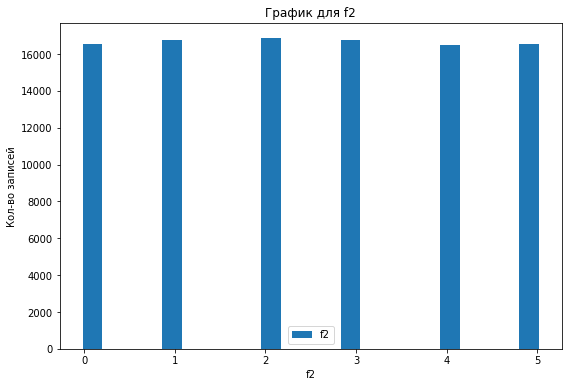

Графики для датасета df_geo_data_2


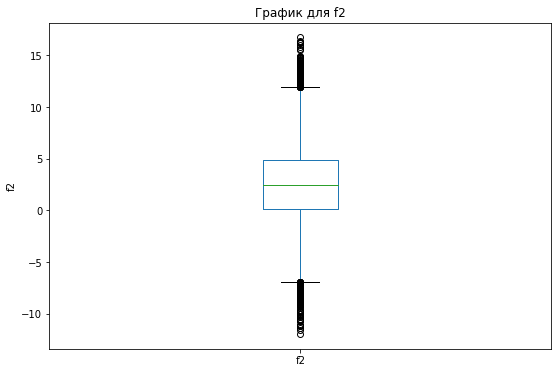

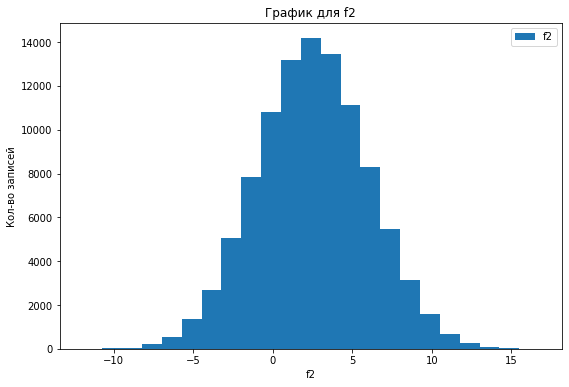

In [19]:
for i in range(len(datasets)):
    print(f'Графики для датасета df_geo_data_{i}')
    
    datasets[i].plot(kind='box', y='f2')
    plt.ylabel('f2')
    plt.title(f'График для f2')
    plt.show()

    datasets[i].plot(kind='hist', y='f2', bins=23)
    plt.xlabel('f2')
    plt.ylabel('Кол-во записей')
    plt.title(f'График для f2')
    
    plt.show()

In [20]:
df_geo_data_1['f2'].unique()

array([-5.87601369e-03,  9.99182737e-01,  5.00116016e+00, ...,
        4.99865060e+00,  1.00014635e+00, -3.29851829e-03])

___
    В разных датасетах признак f2 варьируется от -12 до 16 или от -0.02 до 5
    Данные также, как и f1 слишком отличаются друг от друга
    Имеются выбросы в датасетах df_geo_data_0 и df_geo_data_2. Их устранять мы не будем из-за неопределённости их важности
    В графике df_geo_data_1 данные распределены равномерно
    Нормальное распределение признака можно увидеть в df_geo_data_0 и df_geo_data_2
___



___

    Проведём анализ product
___


In [21]:
print(df_geo_data_0['product'].describe(), '\n')
print(df_geo_data_1['product'].describe(), '\n')
print(df_geo_data_2['product'].describe(), '\n')

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64 

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64 

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64 



Графики для датасета df_geo_data_0


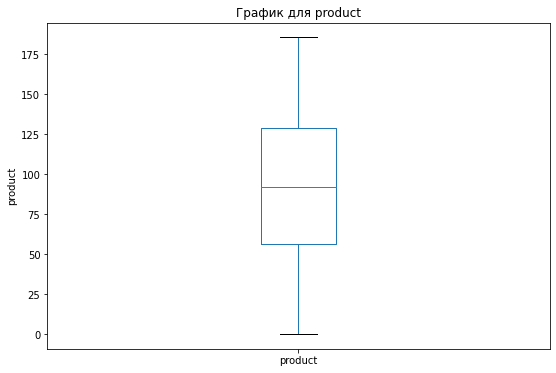

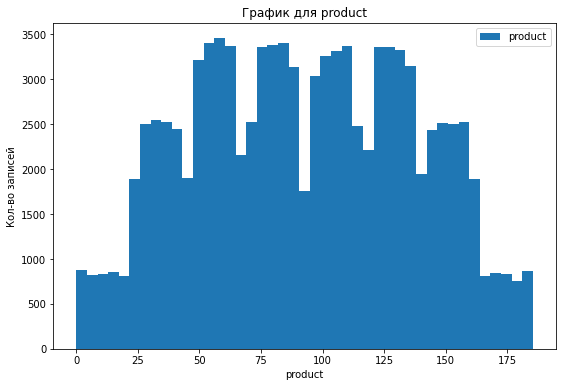

Графики для датасета df_geo_data_1


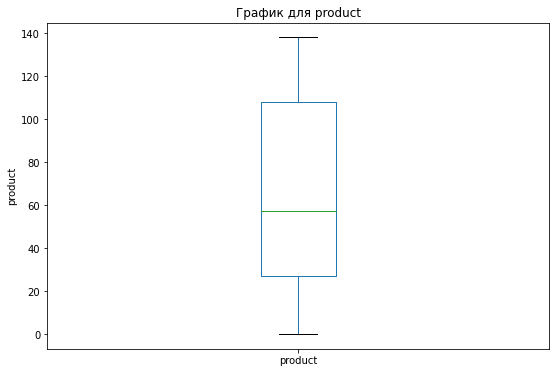

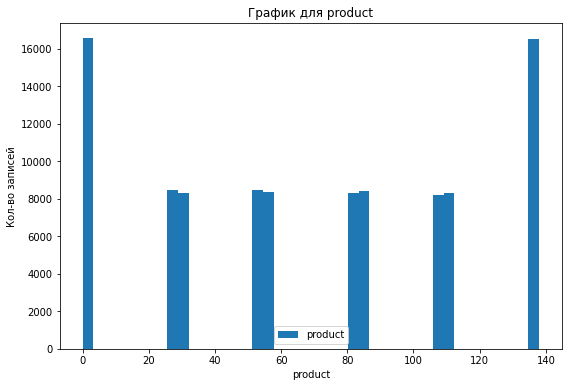

Графики для датасета df_geo_data_2


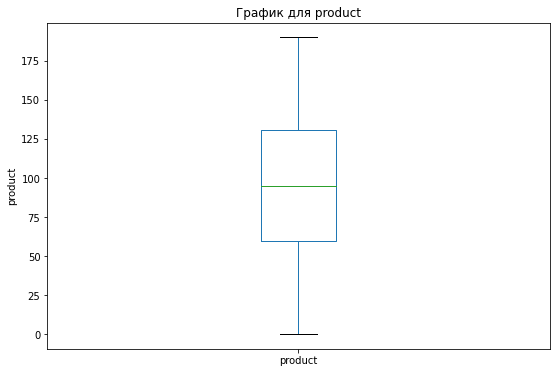

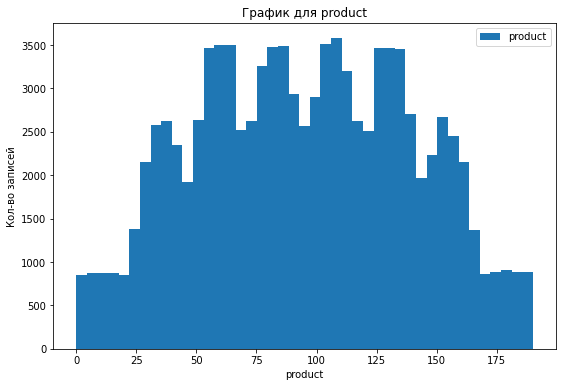

In [22]:
for i in range(len(datasets)):
    print(f'Графики для датасета df_geo_data_{i}')
    
    datasets[i].plot(kind='box', y='product')
    plt.ylabel('product')
    plt.title(f'График для product')
    plt.show()

    datasets[i].plot(kind='hist', y='product', bins=43)
    plt.xlabel('product')
    plt.ylabel('Кол-во записей')
    plt.title(f'График для product')
    
    plt.show()

___
    В разных датасетах признак product варьируется со средним значением 68-95
    Выбросов в данных нет
    В графике видны точечные значения, где записей больше
___

___
###    Вывод:

   **Признаки f0 - f2**

    Данные слишком отличаются друг от друга
    В некоторых данных имеются выбросы, но их невозможно удалить из-за неопределенности важности
    Некоторые графики имеют нормальное распределение
    В графике geo_data_1 признак f2 разделен слишком равномерно, как будто искусственно созданные данные

   **Признак product**

    В разных датасетах признак product варьируется:
    1. Со средним значением 68-95
    2. С минимальным значением у всех: 0
    3. С максимальным значением: 137-190
    
    Выбросов в данных нет
    В графике видны точечные значения, где записей больше
___

##  Корреляционный анализ

---

    Проведем корреляционный анализ признаков в датасетах

---

geo_data_0
               f0        f1        f2   product
f0       1.000000 -0.471395 -0.002685  0.128417
f1      -0.471395  1.000000  0.001413 -0.181143
f2      -0.002685  0.001413  1.000000  0.486394
product  0.128417 -0.181143  0.486394  1.000000


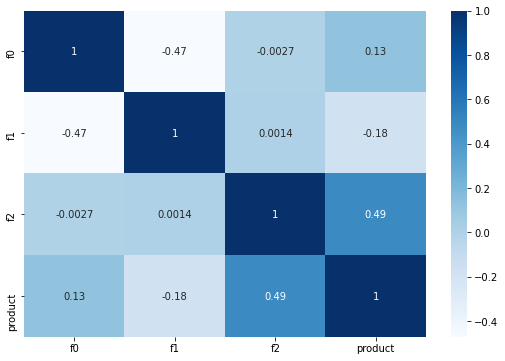

geo_data_1
               f0        f1        f2   product
f0       1.000000  0.182248 -0.002000 -0.122869
f1       0.182248  1.000000 -0.003678 -0.033908
f2      -0.002000 -0.003678  1.000000  0.975605
product -0.122869 -0.033908  0.975605  1.000000


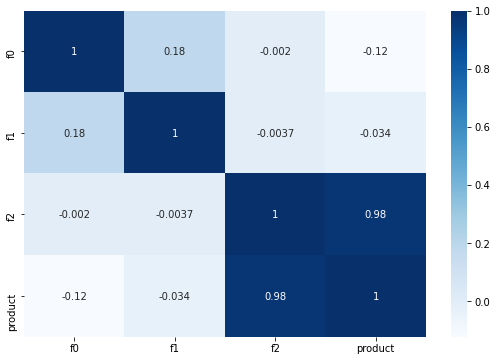

geo_data_2
               f0        f1        f2   product
f0       1.000000  0.002493  0.000053 -0.002464
f1       0.002493  1.000000  0.000378 -0.001463
f2       0.000053  0.000378  1.000000  0.448463
product -0.002464 -0.001463  0.448463  1.000000


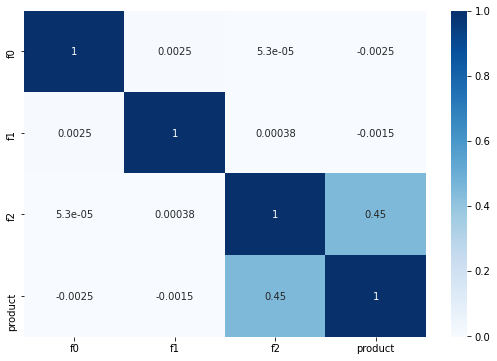

In [23]:
for i in range(len(datasets)):
    print(f'geo_data_{i}')
    numeric_columns = datasets[i].select_dtypes(include=['number']).columns
    corr = datasets[i][numeric_columns].corr(method='spearman')
    print(corr)

    sns.heatmap(corr, cmap="Blues", annot=True)
    plt.show()

<AxesSubplot:xlabel='product', ylabel='f2'>

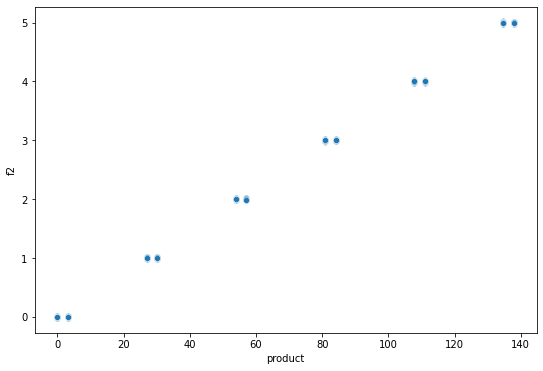

In [24]:
sns.scatterplot(
                data=df_geo_data_1, 
                x='product', 
                y='f2'
            )

---

    Сделаем выводы о взаимосвязи признаков

    С целевым значением - product, сильнее всего коррелирует признак f2
    А признаки f1 и f0 никак с целевым значением не коррелируют

    Интересная картина у признака f2 в датасете df_geo_data_1
    Ранее было замечено, что данные как будто сгенерированы искусственно
    Признак f2 на 0.98 коррелирует с целевым значением
    Так быть не должно. Это сильно повлияет на модель
---

##  Подготовка данных и обучение модели

---
    Разделим данные на обучающую и валидационную выборки в соотношении 75:25.
---

In [25]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    df_geo_data_0.drop(['product', 'id'], axis=1),
    df_geo_data_0['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,)

X_train.shape, X_test.shape

((75000, 3), (25000, 3))

---
    Создадим списки с названиями признаков
---

In [26]:
num_columns = ['f0', 'f1', 'f2']

---
    Создадим общий pipeline для подготовки данных
---

In [27]:
data_preprocessor = ColumnTransformer(
    [
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

---
    Создадим итоговый пайплайн: подготовка данных и модель
---

In [28]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

##  Обучение моделей

---
    Опишем используемые модели
---

In [29]:
param_grid = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__fit_intercept': [True, False]
    }
]

---
    Создадим свою метрику для проверки качества модели: SMAPE
---

In [30]:
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

randomized_search_0 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
)
randomized_search_0.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               ['f0',
                                                                                'f1',
                                                                                'f2'])])),
                                             ('models', LinearRegression())]),
                   n_jobs=-1,
                   param_distributions=[{'models': [LinearRegression()],
                                         'models__fit_intercept': [True, False],
                                         'preprocessor__num': [Standar

In [31]:
print('Лучшая модель и её параметры:\n\n', randomized_search_0.best_estimator_)
print ('Метрика лучшей модели на валидационной выборке:', randomized_search_0.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])
Метрика лучшей модели на валидационной выборке: -37.67153508430459


---
    Проверим работу модели на валидационной выборке
---

In [32]:
y_test_pred_0 = randomized_search_0.predict(X_test)

rmse_0 = np.sqrt(mean_squared_error(y_test, y_test_pred_0))

print(f'Средний запас предсказанного сырья: {y_test_pred_0.mean()}' )
print(f'Метрика RMSE на тестовой выборке: {rmse_0}')

Средний запас предсказанного сырья: 92.39879990657768
Метрика RMSE на тестовой выборке: 37.75660035026169


___
    geo_data_0
    
    RMSE слишком большое для такого среднего запаса сырья. Разброс от правильных значений получается +- 40%
    Выбранная модель по условиям задачи: LinearRegression()
___

___
    Обучим и проверим модель для региона geo_data_1
___

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    df_geo_data_1.drop(['product', 'id'], axis=1),
    df_geo_data_1['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,)

X_train.shape, X_test.shape

((75000, 3), (25000, 3))

In [34]:
randomized_search_1 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

randomized_search_1.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               ['f0',
                                                                                'f1',
                                                                                'f2'])])),
                                             ('models', LinearRegression())]),
                   n_jobs=-1,
                   param_distributions=[{'models': [LinearRegression()],
                                         'models__fit_intercept': [True, False],
                                         'preprocessor__num': [Standar

In [35]:
print('Лучшая модель и её параметры:\n\n', randomized_search_1.best_estimator_)
print ('Метрика лучшей модели на валидационной выборке:', randomized_search_1.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])
Метрика лучшей модели на валидационной выборке: -0.8904429854747921


In [36]:
y_test_pred_1 = randomized_search_1.predict(X_test)

rmse_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_1))

print(f'Средний запас предсказанного сырья: {y_test_pred_1.mean()}' )
print(f'Метрика RMSE на тестовой выборке: {rmse_1}')

Средний запас предсказанного сырья: 68.7128780391376
Метрика RMSE на тестовой выборке: 0.8902801001028846


___
    geo_data_1
    
    Из-за корреляции в 0.98, линейная модель хорошо обучилась предсказывать по метрике f2 и почти не ошибается
    Выбранная модель по условиям задачи: LinearRegression()
___

___
    Обучим и проверим модель для региона geo_data_2
___

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df_geo_data_2.drop(['product', 'id'], axis=1),
    df_geo_data_2['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,)

X_train.shape, X_test.shape

((75000, 3), (25000, 3))

In [38]:
randomized_search_2 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

randomized_search_2.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               ['f0',
                                                                                'f1',
                                                                                'f2'])])),
                                             ('models', LinearRegression())]),
                   n_jobs=-1,
                   param_distributions=[{'models': [LinearRegression()],
                                         'models__fit_intercept': [True, False],
                                         'preprocessor__num': [Standar

In [39]:
print('Лучшая модель и её параметры:\n\n', randomized_search_2.best_estimator_)
print ('Метрика лучшей модели на валидационной выборке:', randomized_search_2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])
Метрика лучшей модели на валидационной выборке: -40.02672829222863


In [40]:
y_test_pred_2 = randomized_search_2.predict(X_test)

rmse_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))

print(f'Средний запас предсказанного сырья: {y_test_pred_2.mean()}' )
print(f'Метрика RMSE на тестовой выборке: {rmse_2}')

Средний запас предсказанного сырья: 94.77102387765939
Метрика RMSE на тестовой выборке: 40.145872311342174


___
    geo_data_2
    
    Результаты похожие на geo_data_0. Метрика RMSE слишком большая и  имеет отклонение в +- 40%
    Выбранная модель по условиям задачи: LinearRegression()
___

___
**Вывод**

    Выбранная модель по условиям задачи: LinearRegression()
    
    Результаты geo_data_0 и geo_data_2 похожи друг на друга. Метрика RMSE слишком большая и имеет отклонение в +- 40%
    В geo_data_0 из-за корреляции в 0.98, линейная модель хорошо обучилась предсказывать по метрике f2 и почти не ошибается 
___

## Подготовка к расчёту прибыли

___
    На этом этапе нам необходимо:
    1. Рассчитать достаточный объём сырья для безубыточной разработки новой скважины
    2. Сравнить полученный объём сырья со средним запасом в каждом регионе.
___

___
    По условии задачи:
    1. Бюджет на разработку скважин в регионе — 10 млрд рублей.
    2. Один баррель сырья приносит 450 рублей дохода
    
    Следовательно, нам необходимо рассчитать, 
    какое кол-во баррелей сырья нам необходимо добыть для преодоления бюджета в 10 млрд рублей.
___

In [41]:
print(f'Достаточный объём сырья для безубыточной разработки новой скважины составляет {round(10000000000 / 450 / 1000)} тысяч баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины составляет 22222 тысяч баррелей


In [42]:
sum_product_0 = round(df_geo_data_0['product'].mean() * 200 )
print(f'Объем первого региона 200 скважин, в среднеим составляет {sum_product_0} тысяч баррелей')

sum_product_1 = round(df_geo_data_1['product'].mean() * 200 )
print(f'Объем второго региона 200 скважин, в среднеим составляет {sum_product_1} тысяч баррелей')

sum_product_2 = round(df_geo_data_2['product'].mean() * 200 )
print(f'Объем третьего региона 200 скважин, в среднеим составляет {sum_product_2} тысяч баррелей')

Объем первого региона 200 скважин, в среднеим составляет 18500 тысяч баррелей
Объем второго региона 200 скважин, в среднеим составляет 13765 тысяч баррелей
Объем третьего региона 200 скважин, в среднеим составляет 19000 тысяч баррелей


___
**Вывод**
    В среднем, объемы регионов не доходят до того, чтобы окупить бюджет на разработку скважин в регионе
    Но первый и третий регионы являются самыми выгодными по имеющимся запасами сырья (18500-19000тыс баррелей)
___

## Расчёт прибыли

___
    На этом этапе нам  необходимо:
    1. Выбрать скважины с максимальными значениями предсказаний. 
    2. Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
    3. Рассчитать прибыль для полученного объёма сырья.
___

___
    По условиям задачи выбирают 200 лучших скважин для разработки
    Необходимо выбрать регион с 200 самыми перспективными скважинами

    Т.к. во всех датасетах одинаковое кол-во скважин, 
    а ранее мы выяснили, что в третьем регионе больше запасов ресурсов, то выберем этот регион
___

In [43]:
features = ['f0', 'f1', 'f2']
predictions = randomized_search_2.predict(df_geo_data_2[features])

df_geo_data_2['predicted_product'] = predictions
best_boreholes_2 = df_geo_data_2.sort_values(by='predicted_product', ascending=False)[:500]
best_boreholes_2.head()

,id,f0,f1,f2,product,predicted_product
3540,4KBhu,-2.548791,3.210600,16.739402,154.062998,176.976289
98714,C6aBZ,-0.209583,1.174825,16.357645,98.664401,174.615753
25463,mMCBz,-1.623992,-3.263073,16.313011,166.293929,174.546751
6647,AaIO6,1.046668,-1.970502,16.252444,152.294162,173.953743
69502,OYrnh,-1.145417,-0.650543,16.223146,121.349438,173.949349


In [44]:
predictions = randomized_search_0.predict(df_geo_data_0[features])
df_geo_data_0['predicted_product'] = predictions

best_boreholes_0 = df_geo_data_0.sort_values(by='predicted_product', ascending=False)[:500]
best_boreholes_0.head()

,id,f0,f1,f2,product,predicted_product
51140,QFDWZ,1.092258,-0.541900,16.003790,182.079984,195.101959
83095,xuWxm,1.888221,0.067384,15.428372,144.009283,185.669565
51464,Fgte6,1.612452,-0.074593,15.230322,173.971897,185.331543
93073,S96Jh,1.814871,-0.207268,14.087536,162.810993,180.464229
52356,R5IYz,0.879559,0.258449,15.202838,123.920559,177.592367


In [45]:
predictions = randomized_search_1.predict(df_geo_data_1[features])
df_geo_data_1['predicted_product'] = predictions

best_boreholes_1 = df_geo_data_1.sort_values(by='predicted_product', ascending=False)[:500]
best_boreholes_1.head()

,id,f0,f1,f2,product,predicted_product
26531,yLbdW,-26.646255,-1.531112,5.001941,137.945408,140.360110
80439,kpPCd,-23.884180,-3.773158,5.001008,137.945408,139.983277
55165,wcKNk,-22.107811,-5.342910,5.006254,137.945408,139.901279
42738,XLXvP,-19.384167,-15.314765,5.010972,137.945408,139.849860
38665,vz1OW,-19.348001,-14.265995,5.010731,137.945408,139.815396


___
    Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели
___

In [46]:
def get_revenue(df):
    top_200 = df.sort_values(by='predicted_product', ascending=False)[:200]
    sum_target = top_200['product'].sum()
    revenue = round(sum_target * 450_000 - 10_000_000_000)
    
    return round(sum_target), revenue

In [47]:
bar_0, revenue_0 = get_revenue(df_geo_data_0)
print('Первый регион')
print(f'Кол-во баррелей в выбранных скважинах: {bar_0} тыс.')
print(f'Прибыль по выбранным скважинам составляет {revenue_0} рублей')

Первый регион
Кол-во баррелей в выбранных скважинах: 30056 тыс.
Прибыль по выбранным скважинам составляет 3525175505 рублей


In [48]:
bar_1, revenue_1 = get_revenue(df_geo_data_1)
print('Второй регион')
print(f'Кол-во баррелей в выбранных скважинах: {bar_1} тыс.')
print(f'Прибыль по выбранным скважинам составляет {revenue_1} рублей')

Второй регион
Кол-во баррелей в выбранных скважинах: 27589 тыс.
Прибыль по выбранным скважинам составляет 2415086697 рублей


In [49]:
bar_2, revenue_2 = get_revenue(df_geo_data_2)
print('Третий регион')
print(f'Кол-во баррелей в выбранных скважинах: {bar_2} тыс.')
print(f'Прибыль по выбранным скважинам составляет {revenue_2} рублей')

Третий регион
Кол-во баррелей в выбранных скважинах: 27991 тыс.
Прибыль по выбранным скважинам составляет 2595973993 рублей


___
**Вывод**

    Самым ценным является первый регион
    У его самых перспективных 200 скважин, в сумме 30056 тыс баррелей, что достаточно для окупаемости
    Прибыль от такого кол-ва сырья составит: 3,525,175,505 рублей
___

## Риски и прибыль

___
    На этом этапе нам  необходимо:
    1. Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    2. Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков
    3. Написать вывод и предложить регион для разработки скважин.
___

___
    По условиям задачи:
    
    После оценки рисков нужно оставить лишь те регионы, 
    в которых вероятность убытков меньше 2.5%. 
    Среди них выбирают регион с наибольшей средней прибылью.
___

___
    Напишем функцию для нахождения средней прибыли, 95%-го доверительного интервала и риск убытков
___

In [50]:
def get_borehole_info(data):
    state = np.random.RandomState(12345)
    values = []
    profits = []
    for _ in range(1000):
        subsample = data.sample(n=500, replace=True, random_state=state)
        values.append(subsample['predicted_product'].quantile(0.99))
    
        _, revenue = get_revenue(subsample)
        profits.append(revenue)
    
    values = pd.Series(values)
        
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    print(f'95%-м доверительным интервалом являются значения: от {lower} до {upper}')
    
    profits = pd.Series(profits)
    mean_profit = profits.mean()
    print(f"Средняя прибыль: {mean_profit:,.2f} рублей")
    
    
    risk_of_loss = (profits < 0).mean() * 100 
    print(f"Риск убытков: {risk_of_loss:.2f}%")

___
    Используем бутстрапинг по всему датафрейму
___

___
    В первом регионе
___

In [51]:
get_borehole_info(df_geo_data_0)

95%-м доверительным интервалом являются значения: от 138.83625869538938 до 152.71081216800647
Средняя прибыль: 422,565,082.85 рублей
Риск убытков: 5.20%


___
    Во втором регионе
___

In [52]:
get_borehole_info(df_geo_data_1)

95%-м доверительным интервалом являются значения: от 137.89137182792123 до 138.62622316597668
Средняя прибыль: 448,723,501.24 рублей
Риск убытков: 1.40%


___
    В третьем регионе
___

In [53]:
get_borehole_info(df_geo_data_2)

95%-м доверительным интервалом являются значения: от 134.25903309816636 до 146.72421718297866
Средняя прибыль: 374,728,178.21 рублей
Риск убытков: 9.00%


## Вывод

___
    Были обучены модели для каждого региона добычи сырья для предсказания кол-ва продукта в скважинах
    Был проведён анализ для выбора самого перспективного региона 

    Для предсказания продукта, была выбрана Линейная модель, тк это стояло в условиях задачи
    Её точность в 1 и 3 регионах составляла на метрике RMSE: от 37 до 40 
    
    На данных предсказанных моделью были проанализированы регионы по возможной прибыли и рискам убытков
    Результаты анализа рисков и убытков:

    В первом регионе
    95%-м доверительным интервалом являются значения: от 138.8 до 152.7
    Средняя прибыль: 422,565,082.85 рублей
    Риск убытков: 5.20%

    Во втором регионе
    95%-м доверительным интервалом являются значения: от 137.9 до 138.6
    Средняя прибыль: 448,723,501.24 рублей
    Риск убытков: 1.40%

    В третьем регионе
    95%-м доверительным интервалом являются значения: от 134.3 до 146.7
    Средняя прибыль: 374,728,178.21 рублей
    Риск убытков: 9.00%

    По условию, нам необходимо  оставить лишь регионы с риском убытков менее 2.5%
    Поэтому самым лучшим регионом будет второй регион, т.к. это единственный регион с риском менее 2.5%
    И  средней прибылью 448,723,501 рублей
___